<a href="https://colab.research.google.com/github/DarkSchneider/Exercises/blob/main/lab4_zeri_ottimizzazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Zeri di funzione ed ottimizzazione

## **Recap funzioni Python**

In [ ]:
def upper_text(text):  
    return text.upper()  

upper_text2 = lambda text: text.upper()  
  
stringa = "Hello world" 

# chiamata alle funzioni

print('upper_text: ', upper_text (stringa)) 
print('upper_text2: ', upper_text2 (stringa))

upper_text:  HELLO WORLD
upper_text2:  HELLO WORLD


In [ ]:
def hello(func):  
    # storing the function in a variable  
    greeting = func("Greetings!")  
    print(greeting) 

hello(upper_text2)      

def hello2(func, text = "Hello world!"):  
    greeting = func(text)  
    print(greeting)

hello2(upper_text2, stringa)
hello2(upper_text2) 

GREETINGS!
HELLO WORLD
HELLO WORLD!


# **Esercizio 1**: Calcolare lo zero di una funzione
---

Scrivere una function che implementi il metodo delle approssimazioni successive per il calcolo dello zero di una funzione f(x) per $x\in \mathbb{R}^{n}$ prendendo come input una funzione per l'aggiornamento:
* $g(x)=x-f(x)e^{x/2}$
* $g(x)=x-f(x)e^{-x/2}$
* $g(x)=x-f(x)/f'(x)$

Testare il risolutore per risolvere $f(x) = e^x − x^2 = 0$, la cui soluzione è $x^∗ = −0.7034674$. In particolare:
* Disegnare il grafico della funzione $f$ nell’intervallo I = [−1,1] e verificare che $x^*$ sia lo zero di f in [-1, 1].
* Calcolare lo zero della funzione utilizzando le funzioni precedentemente scritte.
* Confrontare l'accuratezza delle soluzioni trovate e il numero di iterazioni effettuate dai solutori.
* Modificare la function in modo da calcolare l'errore $||x_k -x^*||_2$ ad ogni iterazione k-esima e graficare  

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def succ_app(f, g, tolf, tolx, maxit, xTrue, x0=0):
  i=0
  err=np.zeros(maxit+1, dtype=np.float64)
  err[0]=tolx+1
  vecErrore=np.zeros(maxit+1, dtype=np.float64)
  vecErrore[0] = np.abs(x0-xTrue)
  x=x0

  while (i<maxit and (err[i]>tolx or abs(f(x))>tolf) ): # scarto assoluto tra iterati
    x_new=g(x)
    err[i+1]= np.abs(x_new-x) # TODO differenza iterate/relative change
    vecErrore[i+1]=np.abs(x_new-xTrue) # TODO distanza soluzione reale
    i=i+1
    x=x_new
  err=err[0:i]      
  vecErrore = vecErrore[0:i]
  return (x, i, err, vecErrore) 

In [ ]:
f = lambda x: np.exp(x) - x**2
df = lambda x: np.exp(x) - 2*x

g1 = lambda x: x - f(x)*np.exp(x/2)
g2 = lambda x: x - f(x)*np.exp(-x/2)
g3 = lambda x: x - f(x)/df(x)

xTrue = -0.7034674
fTrue = f(xTrue)
print(fTrue)

tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 0

4.278746923436216e-08


In [ ]:
[sol_n, iter_n, err_n, vecErrore_g1] = succ_app(f,g1,tolf,tolx,maxit,xTrue,x0)
print('Metodo approssimazioni successive g1 \n x =',sol_n,'\n iter_new=', iter_n, '\n err_new=', err_n)

Metodo approssimazioni successive g1 
 x = -0.7034674225096886 
 iter_new= 23 
 err_new= [1.00000000e+00 1.00000000e+00 3.83400500e-01 1.17244024e-01
 4.05089798e-02 1.35706077e-02 4.59753473e-03 1.55183830e-03
 5.24462857e-04 1.77173520e-04 5.98611679e-05 2.02241612e-05
 6.83286689e-06 2.30851659e-06 7.79944772e-07 2.63508378e-07
 8.90276887e-08 3.00784697e-08 1.01621684e-08 3.43334183e-09
 1.15997256e-09 3.91902844e-10 1.32406419e-10]


In [ ]:
[sol_n, iter_n, err_n, vecErrore_g2] = succ_app(f,g2,tolf,tolx,maxit,xTrue,x0)
print('Metodo approssimazioni successive g2 \n x =',sol_n,'\n iter_new=', iter_n, '\n err_new=', err_n)

Metodo approssimazioni successive g2 
 x = -0.48775858993453886 
 iter_new= 100 
 err_new= [1.         1.         1.04219061 1.01957649 0.94385975 0.98223365
 1.11278511 1.04074055 0.8037594  0.91140699 1.27869319 1.07425042
 0.44066911 0.61396474 1.13305776 1.04600828 0.76137945 0.88553459
 1.30734869 1.07799658 0.37608641 0.54180213 1.01438235 1.00997847
 0.99515077 1.00290482 1.02910081 1.01515022 0.96831298 0.99242163
 1.07419865 1.02972847 0.88193437 0.95361483 1.19853787 1.06071127
 0.61981144 0.78279785 1.31819761 1.07927359 0.35165076 0.51289455
 0.96313921 0.99031723 1.08256876 1.03222923 0.8652816  0.945206
 1.21839553 1.06450456 0.57583185 0.74550275 1.29339163 1.07624049
 0.40754349 0.57771664 1.07533859 1.03007276 0.879677   0.95249302
 1.20131336 1.0612595  0.6136873  0.77776193 1.31555977 1.07897009
 0.35759004 0.52000218 0.97589554 0.99545672 1.06173845 1.02588836
 0.90638298 0.96540639 1.16684902 1.05402627 0.68909572 0.83630043
 1.32982556 1.0805585  0.32549161 0.4809

In [ ]:
[sol_n, iter_n, err_n, vecErrore_g3] = succ_app(f,g3,tolf,tolx,maxit,xTrue,x0)
print('Metodo approssimazioni successive g3 \n x =',sol_n,'\n iter_new=', iter_n, '\n err_new=', err_n)

Metodo approssimazioni successive g3 
 x = -0.7034674224983917 
 iter_new= 6 
 err_new= [1.00000000e+00 1.00000000e+00 2.66956395e-01 2.92358189e-02
 3.40317992e-04 4.58334051e-08]


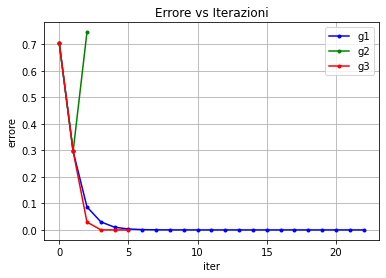

In [ ]:
# GRAFICO Errore vs Iterazioni

# g1
plt.plot(vecErrore_g1, '.-', color='blue')
# g2
plt.plot(vecErrore_g2[:3], '.-', color='green')
# g3
plt.plot(vecErrore_g3, '.-', color='red')

plt.legend( ("g1", "g2", "g3"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()

# **Esercizio 2**: metodo del gradiente per l'ottimizzazione in $\mathbb{R}^2$
---
Scrivere una funzione che implementi il metodo del gradiente rispettivamente con step size $\alpha_k$ variabile, calcolato secondo la procedura di backtracking ad ogni iterazione k-esima.

Testare la function per minimizzare $f(x)$ definita come: 
$$f(x)=10(x-1)^2+(y-2)^2$$

In particolare:
* plotta la superficie $f(x)$ con 
${\tt plt.plot\_surface()}$ e le curve di livello con ${\tt plt.contour()}$.
* plotta, al variare delle iterazioni, la funzione obiettivo, l'errore e la norma del gradiente.

## **Superfici Python**

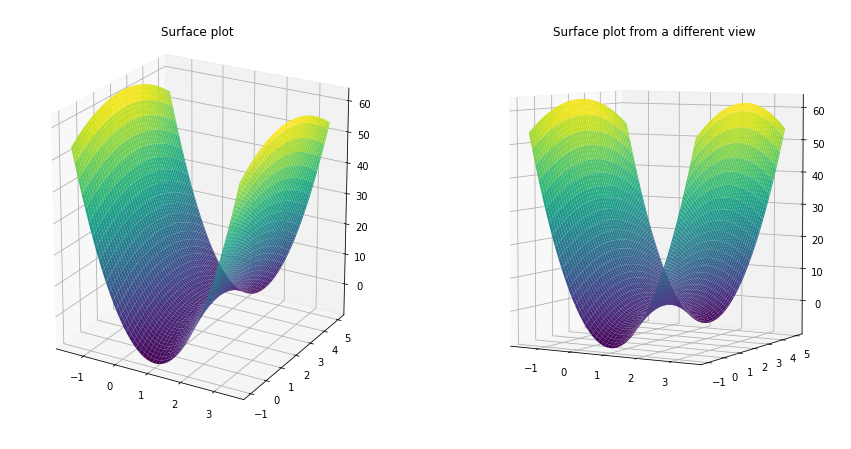

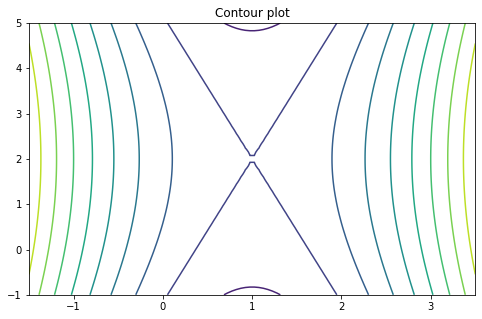

In [5]:
def f(x,y):
    return 10*(x-1)**2 - (y-2)**2


x = np.linspace(-1.5,3.5,100)
y = np.linspace(-1,5,100)
X, Y = np.meshgrid(x, y)
Z=f(X,Y)

plt.figure(figsize=(15, 8))

ax1 = plt.subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title('Surface plot')
ax1.view_init(elev=20)

ax2 = plt.subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_title('Surface plot from a different view')
ax2.view_init(elev=5)
plt.show()

plt.figure(figsize=(8, 5))

contours = plt.contour(X, Y, Z, levels=10)
plt.title('Contour plot')
plt.show()

In [6]:
def next_step(x,b,grad): # backtracking procedure for the choice of the steplength
  alpha=1.1
  rho = 0.5
  c1 = 0.25
  p=-grad
  j=0
  jmax=10
  while ((f(x[0]+alpha*p[0],x[1]+alpha*p[1]) > f(x[0],x[1])+c1*alpha*grad.T@p) and j<jmax ):
    alpha= rho*alpha
    j+=1
  if (j>jmax):
    return -1  #Superfluo??
  else:
    print('alpha=',alpha)
    return alpha

In [8]:
def minimize(x0,b,mode,step,MAXITERATION,ABSOLUTE_STOP): # funzione che implementa il metodo del gradiente
  #declare x_k and gradient_k vectors
  if mode=='plot_history':
    x=np.zeros((2,MAXITERATION))

  norm_grad_list=np.zeros((1,MAXITERATION))
  function_eval_list=np.zeros((1,MAXITERATION))
  error_list=np.zeros((1,MAXITERATION))
  
  #initialize first values
  x_last = np.array([x0[0],x0[1]])

  if mode=='plot_history':
    x[:,0] = x_last
  
  k=0

  function_eval_list[:,k]=f(x_last[0], x_last[1])
  error_list[:,k]=np.linalg.norm(x_last-b)
  norm_grad_list[:,k]=np.linalg.norm(grad_f(x_last))

  while (np.linalg.norm(grad_f(x_last))>ABSOLUTE_STOP and k < MAXITERATION ):
    k=k+1
    grad = grad_f(x_last)
    # TODO direction is given by gradient of the last iteration

    # backtracking step
    step = next_step(x,b,grad)
    # Fixed step
    #step = 0.1
    
    if(step==-1):
      print('non convergente')
      return (iteration) # no convergence

    x_last= grad # TODO gradient update

    if mode=='plot_history':
      x[:,k] = x_last

    function_eval_list[:,k]=f(x_last[0], x_last[1])
    error_list[:,k]=np.linalg.norm(x_last-b)
    norm_grad_list[:,k]=np.linalg.norm(grad_f(x_last))

  function_eval_list = function_eval_list[:,:k+1]
  error_list = error_list[:,:k+1]
  norm_grad_list = norm_grad_list[:,:k+1]
  
  print('iterations=',k)
  print('last guess: x=(%f,%f)'%(x[0,k],x[1,k]))
 
  #plots
  if mode=='plot_history':
    v_x0 = np.linspace(-5,5,500)
    v_x1 = np.linspace(-5,5,500)
    x0v,x1v = np.meshgrid(v_x0,v_x1)
    z = f(x0v,x1v,b)
    
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(v_x0, v_x1, z,cmap='viridis')
    ax.set_title('Surface plot')
    plt.show()

    # plt.figure(figsize=(8, 5))
    contours = plt.contour(x0v, x1v, z, levels=30)
    plt.plot(x[0,0:k],x[1,0:k],'*')
    #plt.axis([-5,5,-5,5])
    plt.axis ('equal')
    plt.show()
  return (x_last,norm_grad_list, function_eval_list, error_list, k)

In [12]:
b=np.array([1,2])

def f(x1,x2,b=b):
  res =  10*(x1-b[0])**2 + (x2-b[1])**2 
  return res

def grad_f(x,b=b):
  return np.array([20*(x[0]-b[0]),2*(x[1]-b[1])])

step=0.1
MAXITERATIONS=1000
ABSOLUTE_STOP=1.e-5
mode='plot_history'
x0 = np.array((3,-5))

(x_last,norm_grad_list, function_eval_list, error_list, k)= minimize(x0, b,mode,step,MAXITERATIONS, ABSOLUTE_STOP)

ValueError: ignored

In [9]:
plt.plot(norm_grad_list.T, 'o-')
plt.xlabel('iter')
plt.ylabel('Norma Gradiente')
plt.title('Iterazioni vs Norma Gradiente')
plt.grid()

NameError: ignored

In [ ]:
plt.plot(error_list.T, 'o-')
plt.xlabel('iter')
plt.ylabel('Errore')
plt.title('Errore vs Iterazioni')
plt.grid()

In [ ]:
plt.plot(function_eval_list.T, 'o-')
plt.xlabel('iter')
plt.ylabel('Funzione Obiettivo')
plt.title('Iterazioni vs Funzione Obiettivo')
plt.grid()